In [1]:
# ============================================================
# 1) DERIVADAS PARCIALES (Ecuaciones normales) para y = a1*x + a0
# ============================================================

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """
    (Σ x^2) * a1 + (Σ x) * a0 = (Σ x*y)
    Devuelve: (c1, c0, c_ind)
    """
    c1 = 0.0      # Σ x^2
    c0 = 0.0      # Σ x
    c_ind = 0.0   # Σ x*y

    for xi, yi in zip(xs, ys):
        c1 += xi * xi
        c0 += xi
        c_ind += xi * yi

    return (c1, c0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """
    (Σ x) * a1 + (n) * a0 = (Σ y)
    Devuelve: (c1, c0, c_ind)
    """
    c1 = float(sum(xs))       # Σ x
    c0 = float(len(xs))       # n
    c_ind = float(sum(ys))    # Σ y

    return (c1, c0, c_ind)


In [2]:
from src import ajustar_min_cuadrados

datos = [(4.1,5.4), (3.6,5.4), (3.3,5.3), (0.2,5.0), (9.8,6.1),
         (9.5,6.0), (3.2,5.3), (5.8,5.5), (0.7,5.2), (4.2,5.4),
         (5.4,5.7), (6.3,5.7), (0.3,5.1), (1.0,5.3), (9.3,5.7),
         (2.4,5.2), (4.7,5.5), (8.8,6.0), (5.2,5.5), (5.6,5.7),
         (4.8,5.5), (9.7,6.1), (7.5,5.9), (0.7,5.1), (8.2,5.9),
         (0.6,5.0), (2.3,5.3), (8.4,5.6), (0.4,5.1), (1.6,5.1),
         (1.5,5.1), (9.6,6.0), (6.6,5.5), (0.9,5.0), (8.2,6.1),
         (5.5,5.5), (9.4,5.9), (4.3,5.4), (6.4,5.6), (3.3,5.5),
         (2.8,5.3), (3.3,5.2), (0.9,5.3), (5.8,5.7), (4.3,5.5),
         (1.0,5.1), (5.4,5.5), (8.0,5.9), (8.6,5.8), (4.0,5.4),
         (8.9,5.8), (3.0,5.4), (9.2,5.9), (3.3,5.3), (8.9,5.9),
         (2.3,5.1), (1.9,5.1), (3.5,5.5), (4.3,5.4), (5.8,5.5),
         (8.9,5.9), (0.7,5.1), (5.8,5.6), (6.2,5.7), (2.4,5.3),
         (1.5,5.1), (0.2,5.1), (3.1,5.3), (6.2,5.6), (4.5,5.4),
         (3.1,5.3), (1.3,5.1), (2.0,5.3) , (0.4,5.1),
         (5.4,5.5), (4.6,5.6), (0.6,4.9), (1.6,5.2), (1.9,5.2),
         (2.2,5.4), (6.4,5.5), (1.1,5.0), (7.9,5.8), (8.1,5.6),
         (3.8,5.3), (1.1,4.9), (3.0,5.4), (5.6,5.6), (5.4,5.5),
         (0.3,5.1), (8.3,6.1), (8.5,5.8), (5.3,5.6), (1.5,5.1),
         (0.9,5.1), (2.7,5.3), (3.0,5.3), (8.0,5.7), (2.0,5.2),
         (9.4,6.0)]

xs = [x for x, y in datos]
ys = [y for x, y in datos]

# “gradiente” = lista de ecuaciones normales (tus derivadas parciales)
a1, a0 = ajustar_min_cuadrados(xs, ys, [der_parcial_0, der_parcial_1])

print("a1 =", a1)
print("a0 =", a0)


[02-18 01:58:53][INFO][PC-PR] 2026-02-18 01:58:53.750361
[02-18 01:58:55][INFO][PC-PR] 2026-02-18 01:58:55.489923
[02-18 01:58:55][INFO][PC-PR] 2026-02-18 01:58:55.491770
[02-18 01:58:55][INFO][PC-PR] Se ajustarán 2 parámetros.
[02-18 01:58:55][INFO][PC-PR] 
[[ 443.4         100.          545.4       ]
 [   0.         -193.00505187 -967.12315291]]
a1 = 0.09993919029138609
a0 = 5.010869630247994


In [7]:
f = lambda x: a1*x + a0


In [8]:
import numpy as np

xs_np = np.array(xs, dtype=float)
ys_np = np.array(ys, dtype=float)

y_hat = f(xs_np)

# Evitar división por cero por si algún yi = 0
eps = 1e-12
den = np.where(np.abs(ys_np) < eps, eps, ys_np)

err_rel = np.abs((ys_np - y_hat) / den)

print("Error relativo promedio:", float(np.mean(err_rel)))
print("Error relativo máximo:  ", float(np.max(err_rel)))


Error relativo promedio: 0.014186571331741133
Error relativo máximo:   0.04506178358541191


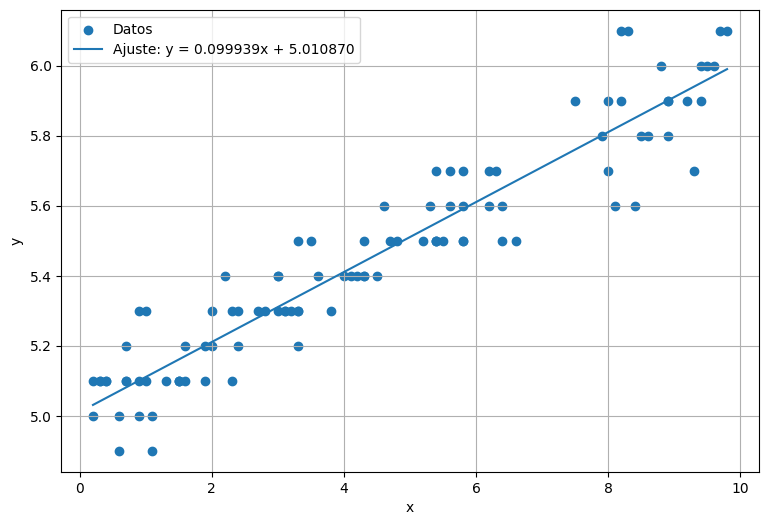

In [9]:
import matplotlib.pyplot as plt

xg = np.linspace(min(xs_np), max(xs_np), 300)
yg = f(xg)

plt.figure(figsize=(9, 6))
plt.scatter(xs_np, ys_np, label="Datos")
plt.plot(xg, yg, label=f"Ajuste: y = {a1:.6f}x + {a0:.6f}")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
